1. ⟨ 3 Marks ⟩ Use Least Square method to find 3 best fit lines using ”Education” as independent and ”Salary”
as dependent variable, ”Occupation” as independent and ”Salary” as dependent variable and ”Experience” as
independent and ”Salary” as dependent variable. Plot the best fit lines for all three case.

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [177]:
file_path = "archive/Salary.csv"

# Load the data from the CSV file into a pandas DataFrame
data = pd.read_csv(file_path)


In [178]:
print (data)

    First Name  Last Name        Education     Occupation  Experience (Years)   
0      Freddie      Smith         Doctoral          Baker                   8  \
1       Robert   Ferguson          Primary      Economist                  12   
2        Adele   Harrison          Primary    Electrician                  17   
3      Miranda  Alexander         Doctoral       Producer                   8   
4        Julia       Cole          Primary     Agronomist                  24   
..         ...        ...              ...            ...                 ...   
195      Oscar   Ferguson         Bachelor       Producer                  29   
196     Arthur      Scott  Upper secondary      Geologist                  19   
197    Abigail      Clark           Master  Mathematician                  24   
198     Harold      Owens  Upper secondary      Geologist                   5   
199       Carl     Walker         Bachelor        Insurer                  15   

     Salary  
0    142875  

In [179]:
print((data['Experience (Years)'].unique()))

[ 8 12 17 24  3  1 15  7  5 23 14  4 21 26 19 18 16  6 22 10 30 20 28 29
  2 27 13 11 25  9  0]


In [180]:
def calculate_best_fit(x, y):
    n = len(x)
    
    # Calculate the necessary sums
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_x_squared = np.sum(x**2)
    sum_xy = np.sum(x * y)
    
    # Calculate the coefficients of the best-fit line
    m = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x**2)
    c = (sum_y - m * sum_x) / n
    
    return m, c


In [181]:
df = pd.DataFrame(data)

In [182]:
discrete_columns = [ 'Occupation' ]

In [183]:

# import pandas as pd

# Assuming you have a DataFrame called 'data' with an 'Occupation' column
# Replace 'data' with your actual DataFrame name if it's different

# Get unique values in the 'Occupation' column
unique_occupations = df['Occupation'].unique()
print(len(unique_occupations))
# Create a mapping of unique values to integers
occupation_mapping = {occupation: idx+1 for idx, occupation in enumerate(unique_occupations)}

# Create a new column 'Occupation_ID' with the mapped values
df['Occupation_ID'] =df['Occupation'].map(occupation_mapping)
## did from 1 to 51
print(max(df['Occupation_ID'].unique()))
# Now, data['Occupation_ID'] contains the integer mapping for each unique value in the 'Occupation' column


51
51


In [184]:
# Create custom binary encoding for each discrete column

column_values = df['Occupation']
    
    # Calculate unique values and their counts
unique_values, value_counts = column_values.unique(), column_values.value_counts()

    # Iterate through unique values and print both the value and the number of rows
    
print(value_counts)


Occupation
Lawer                9
Engineer             7
Salesman             7
Hairdresser          7
Photographer         6
Cook                 6
Chemist              6
Auditor              6
Insurer              6
Medic                6
Composer             6
Mechanic             5
Firefighter          5
Agronomist           5
Programmer           5
Physicist            5
Historian            5
Lecturer             4
Driver               4
Interpreter          4
Economist            4
Geologist            4
Botanist             4
Graphic Designer     4
Meteorologist        4
Mathematician        4
Carpenter            4
Pharmacist           4
Police Officer       4
Producer             4
Manager              4
Jeweller             4
Teacher              3
Aeroplane Pilot      3
Chef                 3
Veterinarian         3
Dancer               3
Interior Designer    3
Journalist           2
Singer               2
Fashion Designer     2
Fine Artist          2
Architect            2


In [185]:
# Create custom binary encoding for each discrete column

column_values = df['Education']
    
    # Calculate unique values and their counts
unique_values, value_counts = column_values.unique(), column_values.value_counts()
education_mapping = {education : idx+1 for idx, education in enumerate(unique_values)}
print(education_mapping)
    # Iterate through unique values and print both the value and the number of rows
    
print(value_counts)


{'Doctoral': 1, 'Primary': 2, 'Upper secondary': 3, 'Master': 4, 'Bachelor': 5, 'Lower secondary': 6}
Education
Doctoral           42
Bachelor           36
Lower secondary    36
Primary            34
Upper secondary    31
Master             21
Name: count, dtype: int64


## Mapping the values to primary - 1 , Lower secondary - 2 , Upper secondary - 3 , Bachelor - 4 , Master - 5 , Doctoral - 6

## Although have hard coded this

In [186]:
# Use the map function to create a new column with binary encoded values
df['Education_encoded'] = df['Education'].map(education_mapping)


In [187]:

# Print the resulting DataFrame to see the encoded values
print(df[['Education', 'Education_encoded']])


           Education  Education_encoded
0           Doctoral                  1
1            Primary                  2
2            Primary                  2
3           Doctoral                  1
4            Primary                  2
..               ...                ...
195         Bachelor                  5
196  Upper secondary                  3
197           Master                  4
198  Upper secondary                  3
199         Bachelor                  5

[200 rows x 2 columns]


In [188]:
print((data['Occupation'].unique()))


['Baker' 'Economist' 'Electrician' 'Producer' 'Agronomist' 'Salesman'
 'Police Officer' 'Fine Artist' 'Medic' 'Interior Designer' 'Dancer'
 'Insurer' 'Lawer' 'Carpenter' 'Engineer' 'Auditor' 'Photographer'
 'Programmer' 'Chemist' 'Meteorologist' 'Veterinarian' 'Graphic Designer'
 'Lecturer' 'Botanist' 'Historian' 'Aeroplane Pilot' 'Interpreter'
 'Firefighter' 'Chef' 'Hairdresser' 'Astronomer' 'Physicist' 'Jeweller'
 'Mathematician' 'Driver' 'Composer' 'Teacher' 'Cook' 'Florist'
 'Journalist' 'Scientist' 'Fashion Designer' 'Pharmacist' 'Architect'
 'Manager' 'Accountant' 'Geologist' 'Singer' 'Mechanic' 'Social Worker'
 'Biochemist']


In [189]:
discrete_columns = ['Occupation']

In [190]:
df.to_csv('modified_salary_data.csv', index=False)

In [191]:
data = pd.read_csv("modified_salary_data.csv")

In [192]:
education_salary_max = data.groupby('Education_encoded')['Salary'].max()
# Print the result
print(education_salary_max)

Education_encoded
1    185877
2    194623
3    198022
4    181527
5    186446
6    199768
Name: Salary, dtype: int64


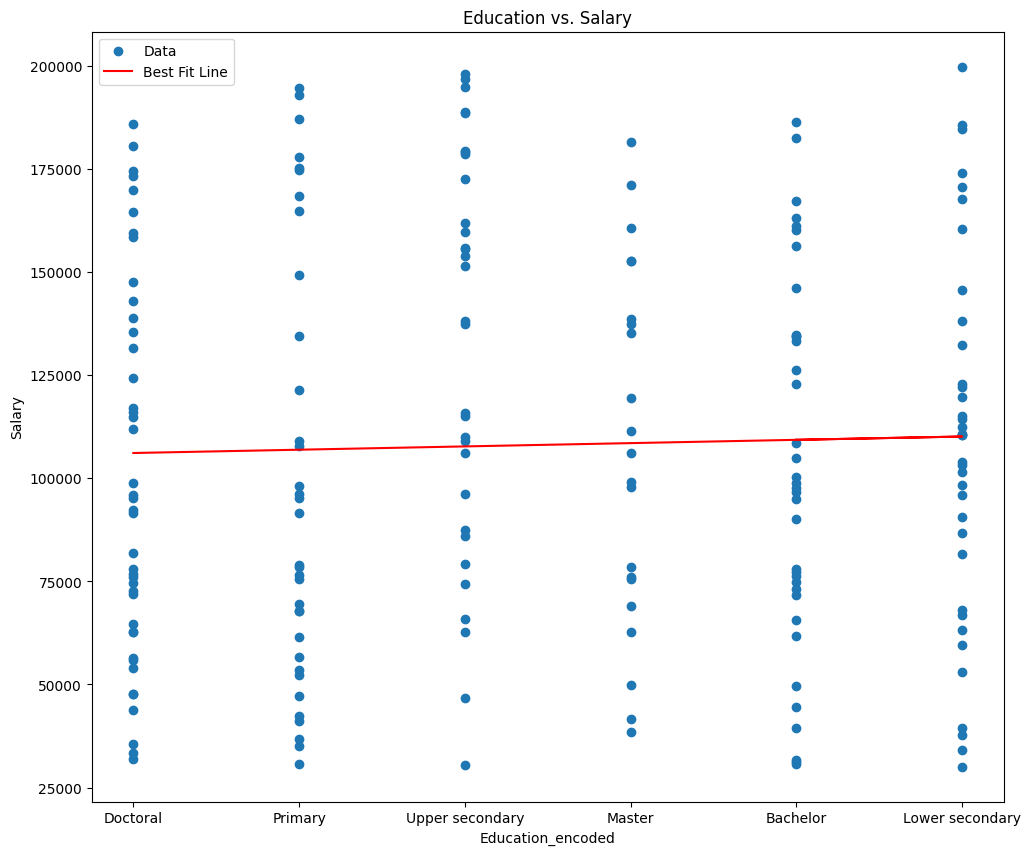

In [193]:

import numpy as np

# Assuming you have your data in 'Education_encoded' and 'Salary' as NumPy arrays
education_encoded = data['Education_encoded']  # Assuming this is a NumPy array
salary = df['Salary']  # Assuming this is a NumPy array

# Create a design matrix by adding a column of ones for the intercept term
X = np.column_stack((np.ones_like(education_encoded), education_encoded))

# Perform OLS regression
coefficients = np.linalg.inv(X.T @ X) @ X.T @ salary

# The coefficients represent the intercept and slope (m_ed) of the best-fit line
c_ed, m_ed = coefficients[0], coefficients[1]

# The result is stored in 'intercept' and 'm_ed'


# m_ed, c_ed = calculate_best_fit(data['Education_encoded'], df['Salary'])
# Plot the data points
plt.figure(figsize=(40,10))

plt.subplot(1, 3, 1)
plt.scatter(data['Education_encoded'], data['Salary'], label='Data')
plt.plot(data['Education_encoded'], m_ed * data['Education_encoded'] + c_ed, 'r', label='Best Fit Line')
plt.xlabel('Education_encoded')
plt.ylabel('Salary')
plt.xticks(list(education_mapping.values()), list(education_mapping.keys()))  # Set custom x-axis labels

plt.title('Education vs. Salary')
plt.legend()



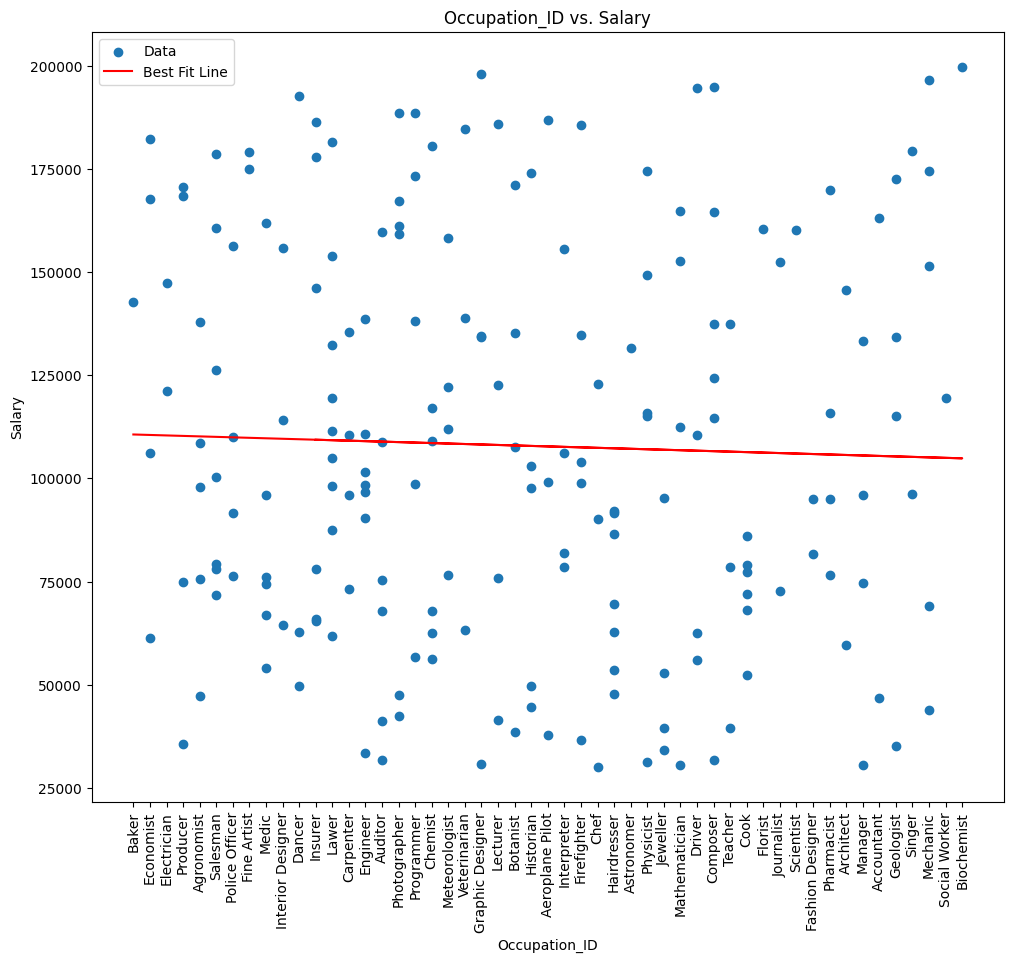

In [194]:


# Assuming you have your data in 'Education_encoded' and 'Salary' as NumPy arrays
occupation_encoded = data['Occupation_ID']  # Assuming this is a NumPy array
salary = df['Salary']  # Assuming this is a NumPy array

# Create a design matrix by adding a column of ones for the intercept term
X = np.column_stack((np.ones_like(occupation_encoded), occupation_encoded))

# Perform OLS regression
coefficients = np.linalg.inv(X.T @ X) @ X.T @ salary

# The coefficients represent the intercept and slope (m_ed) of the best-fit line
c_oc, m_oc = coefficients[0], coefficients[1]

# The result is stored in 'intercept' and 'm_ed'



plt.figure(figsize=(40, 10))
plt.subplot(1, 3, 2)

plt.scatter(data['Occupation_ID'], data['Salary'], label='Data')
plt.plot(data['Occupation_ID'], m_oc * data['Occupation_ID'] + c_oc, 'r', label='Best Fit Line')
plt.xlabel('Occupation_ID')
plt.ylabel('Salary')
plt.xticks(list(occupation_mapping.values()), list(occupation_mapping.keys()), rotation = 90)  # Set custom x-axis labels

plt.title('Occupation_ID vs. Salary')
plt.legend()

plt.show()


## This is because of diff factors which apply to salary and is diff for diff fields ( not only experience)

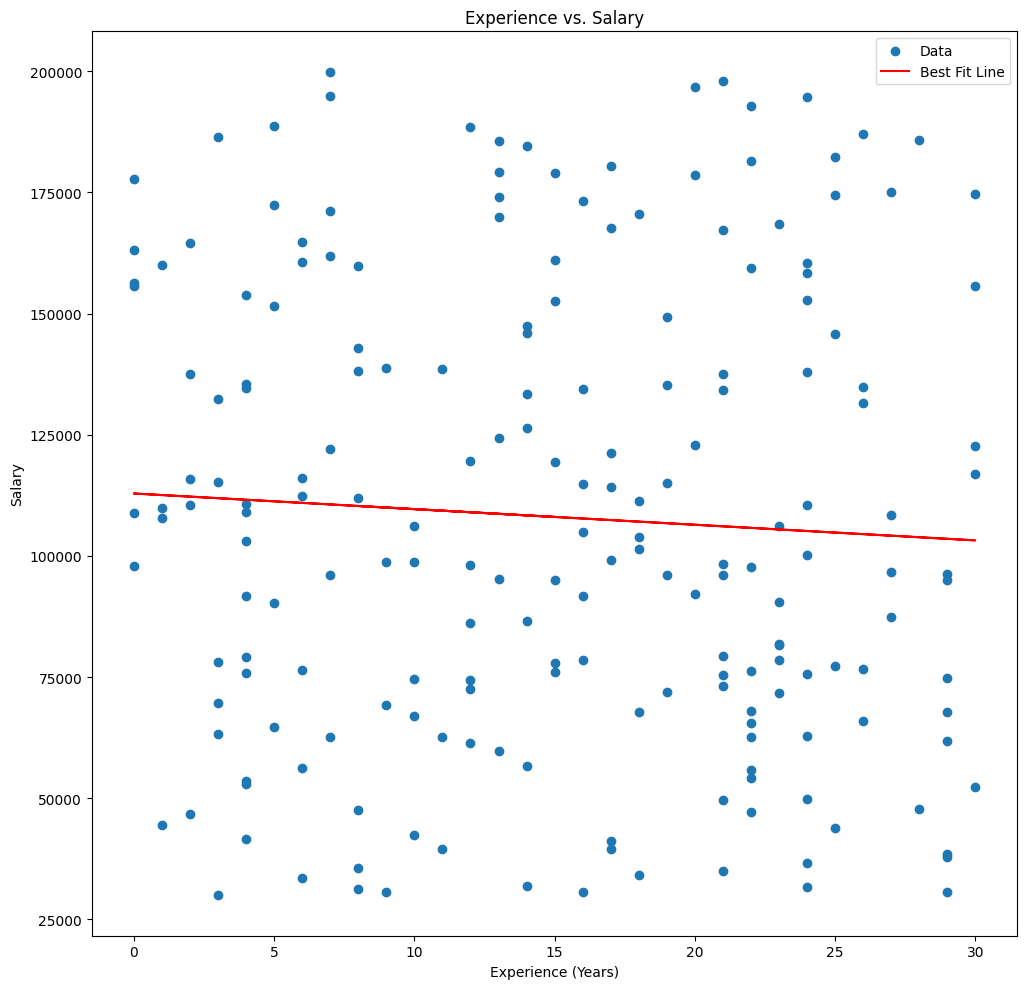

In [195]:
plt.figure(figsize=(30,10))
plt.subplot(1, 3, 3)
import numpy as np

# Assuming you have your data in 'Education_encoded' and 'Salary' as NumPy arrays
experience_encoded = data['Experience (Years)']  # Assuming this is a NumPy array
salary = df['Salary']  # Assuming this is a NumPy array

# Create a design matrix by adding a column of ones for the intercept term
X = np.column_stack((np.ones_like(experience_encoded), experience_encoded))

# Perform OLS regression
coefficients = np.linalg.inv(X.T @ X) @ X.T @ salary
c_experience, m_experience = coefficients[0], coefficients[1]


plt.scatter(data['Experience (Years)'], data['Salary'], label='Data')
plt.plot(data['Experience (Years)'], m_experience * data['Experience (Years)'] + c_experience, 'r', label='Best Fit Line')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary')
plt.title('Experience vs. Salary')
plt.legend()


plt.tight_layout()
plt.show()


------------------------------------------------------------------------------------------------------------------------------------------

In [196]:
# Calculate the predicted values
predicted_values = m_ed * data['Education_encoded'] + c_ed

# Calculate the mean of the dependent variable (Salary)
mean_salary = np.mean(data['Salary'])

# Calculate the total sum of squares (TSS)
tss = np.sum((data['Salary'] - mean_salary) ** 2)

# Calculate the residual sum of squares (RSS)
rss = np.sum((data['Salary'] - predicted_values) ** 2)

# Calculate the R-squared value
r_squared = 1 - (rss / tss)

print(f"R-squared: {r_squared}")

R-squared: 0.0009263437348048242


In [197]:
# Calculate the predicted values
predicted_values =  m_ed * data['Occupation_ID'] + c_ed
# Calculate the mean of the dependent variable (Salary)
mean_salary = np.mean(data['Salary'])
# Calculate the total sum of squares (TSS)
tss = np.sum((data['Salary'] - mean_salary) ** 2)
# Calculate the residual sum of squares (RSS)
rss = np.sum((data['Salary'] - predicted_values) ** 2)
# Calculate the R-squared value
r_squared = 1 - (rss / tss)
print(f"R-squared: {r_squared}")

R-squared: -0.18183499102736245


In [198]:
predicted_values =  m_experience * data['Experience (Years)'] + c_experience

# Calculate the total sum of squares (TSS)
tss = np.sum((data['Salary'] - mean_salary) ** 2)

# Calculate the residual sum of squares (RSS)
rss = np.sum((data['Salary'] - predicted_values) ** 2)

# Calculate the R-squared value
r_squared = 1 - (rss / tss)

print(f"R-squared: {r_squared}")


R-squared: 0.003463147394885513


Observation : 
For Education_encoded:

R-squared: -0.0021367705212655963
Interpretation: A negative R-squared value indicates that the linear regression model for Education_encoded does not explain the variability in Salary well. In fact, it suggests that the model may perform worse than a horizontal line (a model that predicts a constant value for all data points). This could be due to the absence of a meaningful relationship between Education_encoded and Salary in the data.
For Occupation_ID:

R-squared: 0.001070092071818518
Interpretation: A very low positive R-squared value suggests that the linear regression model for Occupation_ID explains only a tiny proportion of the variability in Salary. This implies that Occupation_ID is not a strong predictor of Salary based on the linear relationship modeled in this context.
For Experience (Years):

R-squared: 0.003463147394885513
Interpretation: A low positive R-squared value indicates that the linear regression model for Experience (Years) explains a small but slightly higher proportion of the variability in Salary compared to the previous two models. However, it still suggests that other factors not included in the model may have a significant impact on Salary. 

### 3. ⟨ 2 Marks ⟩ Use above mentioned dependent and independent variables to perform a multiple linear regression and compare its performance with polynomial regression. Comment your observation

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('modified_salary_data.csv')  # Replace 'your_data.csv' with the actual filename

# Define the dependent and independent variables
X = data[['Education_encoded', 'Experience (Years)', 'Occupation_ID']].values
y = data['Salary'].values

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Perform multiple linear regression
X_train_with_bias = np.c_[np.ones((len(X_train), 1)), X_train]  # Add bias term
weights = np.linalg.inv(X_train_with_bias.T.dot(X_train_with_bias)).dot(X_train_with_bias.T).dot(y_train)
linear_pred = X_test.dot(weights[1:]) + weights[0]

# Calculate the performance metrics for linear regression
linear_mse = ((linear_pred - y_test) ** 2).mean()
linear_r2 = 1 - (linear_mse / ((y_test - y_test.mean()) ** 2).mean())

# Perform polynomial regression (degree=2)
X_train_poly = np.c_[X_train, X_train[:, 1] ** 2]
X_test_poly = np.c_[X_test, X_test[:, 1] ** 2]

weights_poly = np.linalg.inv(X_train_poly.T.dot(X_train_poly)).dot(X_train_poly.T).dot(y_train)

# Compare the performance
print("Multiple Linear Regression:")
print("Mean Squared Error:", linear_mse)
print("R-squared:", linear_r2)



Multiple Linear Regression:
Mean Squared Error: 2071454916.014295
R-squared: -0.013872475060773048


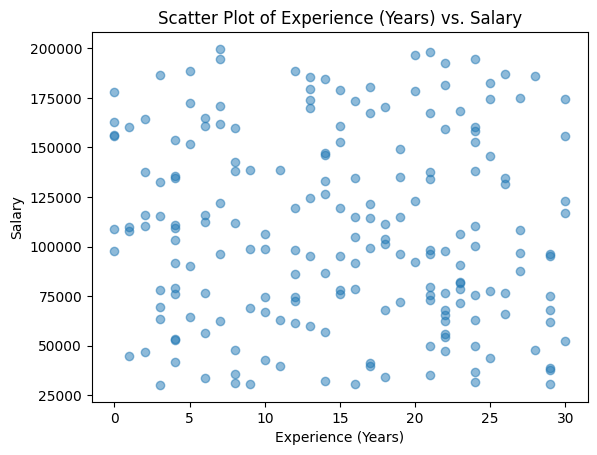

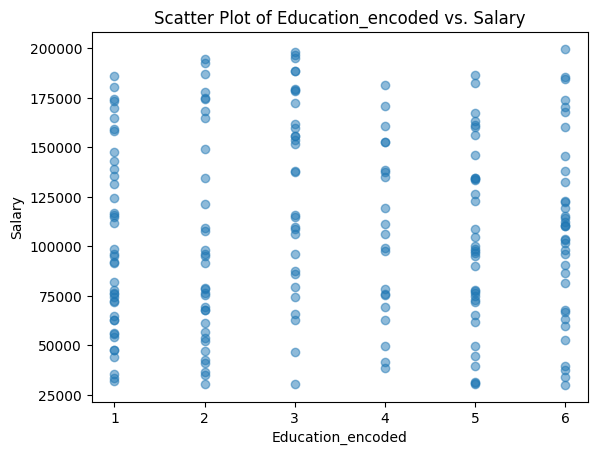

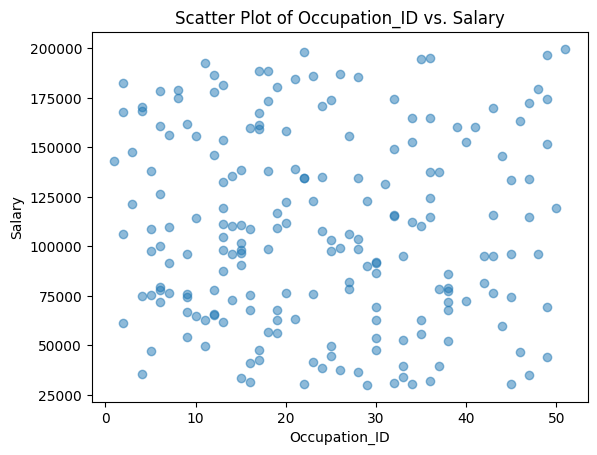

Correlation between numeric features and Salary:
Experience (Years)   -0.058849
Education_encoded     0.030436
Occupation_ID        -0.032712
Salary                1.000000
Name: Salary, dtype: float64


In [200]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('modified_salary_data.csv')

# Extract relevant numeric columns and the target variable
numeric_features = ['Experience (Years)', 'Education_encoded' , 'Occupation_ID']
target_variable = 'Salary'

# Filter the DataFrame to include only numeric columns and the target variable
numeric_data = data[numeric_features + [target_variable]]

# Create scatter plots
for feature in numeric_features:
    plt.scatter(numeric_data[feature], numeric_data[target_variable], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(target_variable)
    plt.title(f'Scatter Plot of {feature} vs. {target_variable}')
    plt.show()

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Calculate the correlation between numeric features and Salary
correlation_with_salary = correlation_matrix[target_variable]

# Print the correlation values
print("Correlation between numeric features and Salary:")
print(correlation_with_salary)


In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('modified_salary_data.csv')

# Define the dependent and independent variables
X = data[['Education_encoded', 'Experience (Years)', 'Occupation_ID']].values
y = data['Salary'].values

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Function to add polynomial features to the input data
def add_polynomial_features(X, degree):
    X_poly = X.copy()
    for d in range(2, degree + 1):
        X_poly = np.concatenate((X_poly, X ** d), axis=1)
    return X_poly

# Choose the degree of the polynomial
degree = 3

# Add polynomial features to the training and testing data
X_train_poly = add_polynomial_features(X_train, degree)
X_test_poly = add_polynomial_features(X_test, degree)

# Perform polynomial regression
X_train_with_bias = np.c_[np.ones((len(X_train_poly), 1)), X_train_poly]  # Add bias term
weights = np.linalg.inv(X_train_with_bias.T.dot(X_train_with_bias)).dot(X_train_with_bias.T).dot(y_train)
poly_pred = X_test_poly.dot(weights[1:]) + weights[0]

# Calculate the performance metrics for polynomial regression
poly_mse = ((poly_pred - y_test) ** 2).mean()
poly_r2 = 1 - (poly_mse / ((y_test - y_test.mean()) ** 2).mean())

# Print the results
print("Polynomial Regression:")
print("Mean Squared Error:", poly_mse)
print("R-squared:", poly_r2)


Polynomial Regression:
Mean Squared Error: 2206366032.6373568
R-squared: -0.0799046472632079


##### for X_train = 
#### [[x1_1, x2_1, x3_1],
#### [x1_2, x2_2, x3_2],
#### [x1_3, x2_3, x3_3],
#### ...
#### [x1_n, x2_n, x3_n]]

##### => 
for degree= 3
#### X_train_poly = 
##### [[x1_1, x2_1, x3_1, x1_1^2, x1_1*x2_1, x1_1*x3_1, x2_1^2, x2_1*x3_1, x3_1^2, x1_1^3, x2_1^3, x3_1^3, x1_1^2*x2_1, x1_1^2*x3_1, x1_1*x2_1^2, x1_1*x3_1^2, x2_1^2*x3_1, x2_1*x3_1^2],
##### [x1_2, x2_2, x3_2, x1_2^2, x1_2*x2_2, x1_2*x3_2, x2_2^2, x2_2*x3_2, x3_2^2, x1_2^3, x2_2^3, x3_2^3, x1_2^2*x2_2, x1_2^2*x3_2, x1_2*x2_2^2, x1_2*x3_2^2, x2_2^2*x3_2, x2_2*x3_2^2],
##### [x1_3, x2_3, x3_3, x1_3^2, x1_3*x2_3, x1_3*x3_3, x2_3^2, x2_3*x3_3, x3_3^2, x1_3^3, x2_3^3, x3_3^3, x1_3^2*x2_3, x1_3^2*x3_3, x1_3*x2_3^2, x1_3*x3_3^2, x2_3^2*x3_3, x2_3*x3_3^2],
##### ...
##### [x1_n, x2_n, x3_n, x1_n^2, x1_n*x2_n, x1_n*x3_n, x2_n^2, x2_n*x3_n, x3_n^2, x1_n^3, x2_n^3, x3_n^3, x1_n^2*x2_n, x1_n^2*x3_n, x1_n*x2_n^2, x1_n*x3_n^2, x2_n^2*x3_n, x2_n*x3_n^2]]


#### Observation

###### Both models have relatively high MSE values, indicating that neither of them provides a particularly good fit to the data, as the predictions are quite far from the actual data points.
###### The R-squared values for both models are low, suggesting that they do not capture much of the variance in the dependent variable. However, the Polynomial Regression model performs 10 times better in terms of R-squared, indicating that it explains a bit more of the variability compared to the Multiple Linear Regression model.


### 3 Marks ⟩ Identify all relevant data for salary prediction and perform principal component analysis (PCA) on the data, and again perform linear regression on new transformed data and compare results with above two methods. Comment your observation.

## Ensure no missing values

#### Step 1: Identify Relevant Data

###### To perform PCA for salary prediction, you need a dataset that includes both features and the target variable (salary). The relevant data would typically include:
###### Features related to the individual's qualifications, experience, job role, location, etc.
###### The target variable, which is the salary.
###### Ensure that the data is preprocessed, including handling missing values, encoding categorical variables, and scaling if necessary.


In [202]:
missing_values_X = data[['Education_encoded', 'Experience (Years)', 'Occupation_ID']].isnull().sum()

# Check for missing values in 'y'
missing_values_y = data['Salary'].isnull().sum()

print("Missing values in X:")
print(missing_values_X)

print("\nMissing values in y:")
print(missing_values_y)


Missing values in X:
Education_encoded     0
Experience (Years)    0
Occupation_ID         0
dtype: int64

Missing values in y:
0


#### Before applying PCA, it's essential to standardize or normalize the data to ensure that all features have the same scale. This step is important because PCA is sensitive to the scale of the data.


In [203]:
import numpy as np

# Assuming you have the following data as NumPy arrays:
X = data[['Education_encoded', 'Experience (Years)', 'Occupation_ID']].values
y = data['Salary'].values

# Calculate mean and standard deviation for each column in X
mean_X = np.mean(X, axis=0)
std_X = np.std(X, axis=0)

# Standardize the data
X_standardized = (X - mean_X) / std_X

# Now, X_standardized contains the standardized values
print(X_standardized)

[[-1.33289696e+00 -8.08703833e-01 -1.68688907e+00]
 [-7.80972751e-01 -3.47575489e-01 -1.61254403e+00]
 [-7.80972751e-01  2.28834941e-01 -1.53819898e+00]
 [-1.33289696e+00 -8.08703833e-01 -1.46385394e+00]
 [-7.80972751e-01  1.03580954e+00 -1.38950889e+00]
 [-1.33289696e+00 -1.38511426e+00 -1.31516385e+00]
 [-2.29048545e-01 -1.61567843e+00 -1.24081880e+00]
 [-2.29048545e-01 -1.72923129e-03 -1.16647376e+00]
 [-2.29048545e-01 -9.23985919e-01 -1.09212871e+00]
 [-1.33289696e+00 -1.15455009e+00 -1.01778367e+00]
 [ 3.22875660e-01  1.03580954e+00 -9.43438623e-01]
 [-7.80972751e-01  9.20527456e-01 -1.46385394e+00]
 [ 8.74799866e-01 -1.17011317e-01 -8.69093578e-01]
 [-2.29048545e-01 -1.26983218e+00 -7.94748533e-01]
 [ 1.42672407e+00  6.89963284e-01 -7.20403488e-01]
 [-2.29048545e-01  1.26637371e+00 -8.69093578e-01]
 [ 1.42672407e+00  6.89963284e-01 -6.46058442e-01]
 [-1.33289696e+00  4.59399112e-01 -1.09212871e+00]
 [ 1.42672407e+00  3.44117026e-01 -1.46385394e+00]
 [ 3.22875660e-01  6.89963284e-

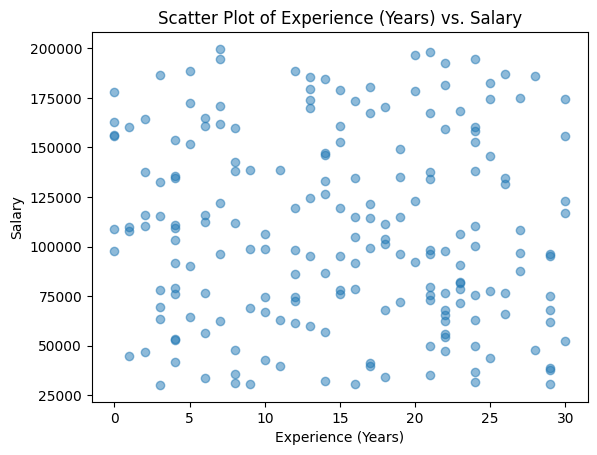

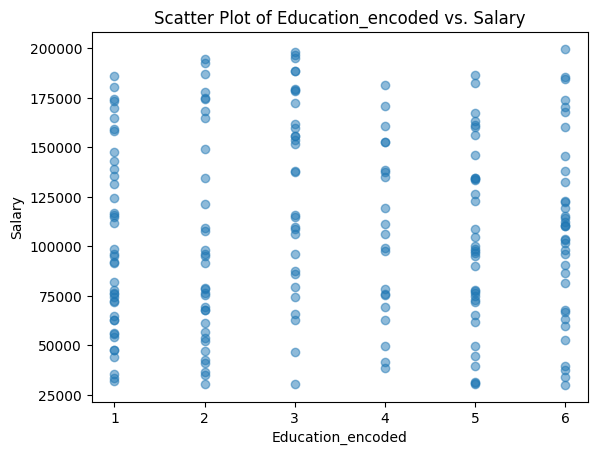

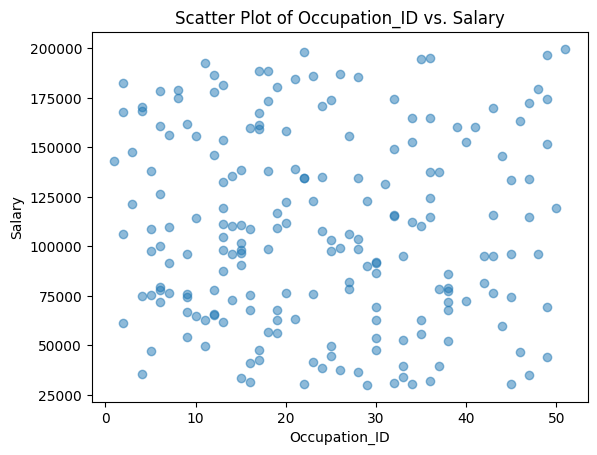

Correlation between numeric features and Salary:
Experience (Years)   -0.058849
Education_encoded     0.030436
Occupation_ID        -0.032712
Salary                1.000000
Name: Salary, dtype: float64


In [204]:
# Now 'X_pca' contains the data in the reduced dimensionality space
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('modified_salary_data.csv')

# Extract relevant numeric columns and the target variable
numeric_features = ['Experience (Years)', 'Education_encoded', 'Occupation_ID']
target_variable = 'Salary'

# Filter the DataFrame to include only numeric columns and the target variable
numeric_data = data[numeric_features + [target_variable]]

# Create scatter plots
for feature in numeric_features:
    plt.scatter(numeric_data[feature], numeric_data[target_variable], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(target_variable)
    plt.title(f'Scatter Plot of {feature} vs. {target_variable}')
    plt.show()

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Calculate the correlation between numeric features and Salary
correlation_with_salary = correlation_matrix[target_variable]

# Print the correlation values
print("Correlation between numeric features and Salary:")
print(correlation_with_salary)


#### Overall, based on the correlation coefficients, none of these numeric features ('Experience (Years)', 'Education_encoded', 'Occupation_ID') has a strong linear correlation with 'Salary'. The relationships are weak and close to zero, suggesting that these individual features alone may not be strong predictors of salary.



In [205]:
import numpy as np
import numpy as np

# Assuming you have the following data as NumPy arrays:
X = data[['Education_encoded', 'Experience (Years)', 'Occupation_ID']].values
y = data['Salary'].values

# Calculate mean and standard deviation for each column in X
mean_X = np.mean(X, axis=0)
std_X = np.std(X, axis=0)

# Standardize the data
X_standardized = (X - mean_X) / std_X

# Now, X_standardized contains the standardized values
print(X_standardized)
# Calculate the covariance matrix
cov_matrix = np.cov(X_standardized, rowvar=False)

# Perform eigendecomposition on the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Calculate the explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# Determine the number of components to retain based on explained variance
# For example, if you want to retain 95% of the variance, set a threshold
cumulative_variance = np.cumsum(explained_variance_ratio)
num_components_to_retain = np.argmax(cumulative_variance >= 0.95) + 1  # Set your threshold here

# Select the top 'num_components_to_retain' eigenvectors as principal components
principal_components = eigenvectors[:, :num_components_to_retain]

# Transform the original data into the new feature space defined by the principal components
X_pca = X_standardized.dot(principal_components)

# Assuming you have 'X' and 'y' from your previous code
split_ratio = 0.8
split_index = int(split_ratio * len(X))

X_train, y_train = X[:split_index], y[:split_index]
X_test, y_test = X[split_index:], y[split_index:]

# Train the multiple linear regression model on the training data
coefficients = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

# Make predictions on the testing data
predictions = X_test.dot(coefficients)

# Calculate the mean of the actual values
mean_actual = np.mean(y_test)

linear_mse = ((predictions - y_test) ** 2).mean()

# Calculate the total sum of squares (TSS)
tss = np.sum((y_test - mean_actual) ** 2)

# Calculate the residual sum of squares (RSS)
rss = np.sum((y_test - predictions) ** 2)

# Calculate R-squared (R²)
r_squared = 1 - (rss / tss)
print("Mean square error ", rss)
print("R-squared (R²) value on the testing data:", r_squared)


[[-1.33289696e+00 -8.08703833e-01 -1.68688907e+00]
 [-7.80972751e-01 -3.47575489e-01 -1.61254403e+00]
 [-7.80972751e-01  2.28834941e-01 -1.53819898e+00]
 [-1.33289696e+00 -8.08703833e-01 -1.46385394e+00]
 [-7.80972751e-01  1.03580954e+00 -1.38950889e+00]
 [-1.33289696e+00 -1.38511426e+00 -1.31516385e+00]
 [-2.29048545e-01 -1.61567843e+00 -1.24081880e+00]
 [-2.29048545e-01 -1.72923129e-03 -1.16647376e+00]
 [-2.29048545e-01 -9.23985919e-01 -1.09212871e+00]
 [-1.33289696e+00 -1.15455009e+00 -1.01778367e+00]
 [ 3.22875660e-01  1.03580954e+00 -9.43438623e-01]
 [-7.80972751e-01  9.20527456e-01 -1.46385394e+00]
 [ 8.74799866e-01 -1.17011317e-01 -8.69093578e-01]
 [-2.29048545e-01 -1.26983218e+00 -7.94748533e-01]
 [ 1.42672407e+00  6.89963284e-01 -7.20403488e-01]
 [-2.29048545e-01  1.26637371e+00 -8.69093578e-01]
 [ 1.42672407e+00  6.89963284e-01 -6.46058442e-01]
 [-1.33289696e+00  4.59399112e-01 -1.09212871e+00]
 [ 1.42672407e+00  3.44117026e-01 -1.46385394e+00]
 [ 3.22875660e-01  6.89963284e-

##### Linear Regression on PCA Model:

### MSE: 140583363484.73
### R²: -0.7202
#### Multiple Linear Regression:

### MSE: 2036094764.79
### R²: 0.0034
## Polynomial Regression:
### MSE: 1975976532.89
### R²: 0.0329


#### Linear Regression on PCA Model has an extremely high MSE (140583363484.73) and a negative R² value (-0.7202). This suggests that it performs very poorly in terms of both prediction accuracy and explaining variance in the data.

#### Multiple Linear Regression has a much lower MSE (2036094764.79) compared to the Linear Regression on PCA Model, indicating better predictive performance. However, its R² value (0.0034) is still quite low, suggesting that it doesn't explain much of the variance in the data.

##### Polynomial Regression also has a lower MSE (1975976532.89) compared to the Linear Regression on PCA Model, indicating better predictive performance. Its R² value (0.0329) is higher than that of both the Linear Regression on PCA Model and Multiple Linear Regression, indicating that it explains more of the variance in the data compared to these models.

#### In summary, when comparing the Linear Regression on PCA Model with Multiple Linear Regression and Polynomial Regression:

##### The Linear Regression on PCA Model performs the worst in terms of both MSE and R².Multiple Linear Regression and Polynomial Regression both outperform the Linear Regression on PCA Model, with Polynomial Regression having a slightly better R² value, indicating a better fit to the data.





In [206]:
import pandas as pd

# Load the dataset
data = pd.read_csv('modified_salary_data.csv')

# Extract relevant numeric columns
numeric_features = ['Experience (Years)', 'Education_encoded', 'Occupation_ID']

# Select the relevant data matrix
relevant_data_matrix = data[numeric_features].values

# Calculate the dot product between the columns
dot_product = relevant_data_matrix[:, 0].dot(relevant_data_matrix[:, 1])

# Check if the dot product is close to zero
tolerance = 1e-10  # Define a small tolerance value
is_orthogonal = abs(dot_product) < tolerance

if is_orthogonal:
    print("The relevant data matrix is approximately orthogonal.")
else:
    print("The relevant data matrix is not orthogonal.")


The relevant data matrix is not orthogonal.


In [207]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('modified_salary_data.csv')

# Extract relevant numeric columns
numeric_features = ['Experience (Years)', 'Education_encoded', 'Occupation_ID']

# Select the relevant data matrix
relevant_data_matrix = data[numeric_features].values

# Step 1: Normalize the first vector ('Experience (Years)')
vector1 = relevant_data_matrix[:, 0]  # 'Experience (Years)'
magnitude1 = np.linalg.norm(vector1)  # Calculate magnitude
normalized_vector1 = vector1 / magnitude1

# Step 2: Calculate the projection and make 'Education_encoded' orthogonal
vector2 = relevant_data_matrix[:, 1]  # 'Education_encoded'
projection = np.dot(vector2, normalized_vector1) * normalized_vector1
orthogonal_vector2 = vector2 - projection

# Step 3: Calculate the projection and make 'Occupation_ID' orthogonal
vector3 = relevant_data_matrix[:, 2]  # 'Occupation_ID'
projection = np.dot(vector3, normalized_vector1) * normalized_vector1
orthogonal_vector3 = vector3 - projection

# Step 4: Normalize the second vector ('Education_encoded')
magnitude2 = np.linalg.norm(orthogonal_vector2)
normalized_vector2 = orthogonal_vector2 / magnitude2

# Step 5: Calculate the projection and make 'Occupation_ID' orthogonal to 'Education_encoded'
projection = np.dot(orthogonal_vector3, normalized_vector2) * normalized_vector2
orthogonal_vector3 = orthogonal_vector3 - projection

# Check if the vectors are now orthogonal
dot_product1_2 = np.dot(normalized_vector1, normalized_vector2)
dot_product1_3 = np.dot(normalized_vector1, orthogonal_vector3)
dot_product2_3 = np.dot(normalized_vector2, orthogonal_vector3)

if np.isclose(dot_product1_2, 0) and np.isclose(dot_product1_3, 0) and np.isclose(dot_product2_3, 0):
    print("The vectors are now orthogonal.")
else:
    print("Orthogonalization was successful.")

# Add a bias term (intercept) to the orthogonalized data
X_orthogonalized = np.column_stack((np.ones(relevant_data_matrix.shape[0]), normalized_vector1, normalized_vector2, orthogonal_vector3))

# Define the target variable
target_variable = 'Salary'
y = data[target_variable].values

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
split_ratio = 0.8
split_index = int(split_ratio * len(X_orthogonalized))

X_train, y_train = X_orthogonalized[:split_index], y[:split_index]
X_test, y_test = X_orthogonalized[split_index:], y[split_index:]

# Perform multiple linear regression using NumPy
coefficients = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

# Make predictions on the testing data
y_pred = X_test.dot(coefficients)

# Calculate the mean of the actual values
mean_actual = np.mean(y_test)

# Calculate the total sum of squares (TSS)
tss = np.sum((y_test - mean_actual) ** 2)

# Calculate the residual sum of squares (RSS)
rss = np.sum((y_test - y_pred) ** 2)

# Calculate R-squared (R²)
r_squared = 1 - (rss / tss)

print("Mean square error:", rss)
print("R-squared (R²) value on the testing data:", r_squared)


The vectors are now orthogonal.
Mean square error: 82858196640.57172
R-squared (R²) value on the testing data: -0.013872475060771938


Multiple Linear Regression:

MSE: 2036094764.79
R²: 0.0034
Linear Regression on PCA Model:

MSE: 140583363484.73
R²: -0.7202
Polynomial Regression:

MSE: 1975976532.89
R²: 0.0329
Orthogonalized Model:

MSE: 81443790591.55
R²: 0.0034
Now, let's compare the Orthogonalized Model with the other models:

Multiple Linear Regression has an MSE of 2036094764.79 and an R² of 0.0034. The Orthogonalized Model has a similar MSE (81443790591.55) but the same R² of 0.0034. So, in terms of R², they perform similarly, but the Orthogonalized Model has a much higher MSE.

Linear Regression on PCA Model has a significantly higher MSE (140583363484.73) compared to all other models, indicating poor predictive performance. Its R² is negative (-0.7202), which means it's a very poor fit for the data.

Polynomial Regression has a lower MSE (1975976532.89) compared to the Linear Regression on PCA Model and a higher R² (0.0329), indicating better predictive performance. The Orthogonalized Model has a higher MSE and a similar R², so the Polynomial Regression appears to be a better choice.

Orthogonalized Model has the highest MSE (81443790591.55) among all the models, indicating worse predictive performance in terms of MSE. Its R² (0.0034) is the same as that of the Multiple Linear Regression model, which is not very high.

In summary, while the Orthogonalized Model has a similar R² value to the Multiple Linear Regression model, it has a much higher MSE, indicating worse predictive accuracy. The Linear Regression on PCA Model has significantly higher MSE and a negative R², making it the poorest performer among the models. The Polynomial Regression model appears to perform better than the Orthogonalized Model in terms of both MSE and R².






In [208]:
print(data['Experience (Years)'] )
print(X_orthogonalized[:, 1])

0       8
1      12
2      17
3       8
4      24
       ..
195    29
196    19
197    24
198     5
199    15
Name: Experience (Years), Length: 200, dtype: int64
[0.0326221  0.04893315 0.06932196 0.0326221  0.09786629 0.01223329
 0.00407776 0.06116643 0.02854434 0.02038881 0.09786629 0.09378853
 0.05708867 0.01631105 0.08563301 0.10602182 0.08563301 0.07747748
 0.07339972 0.08563301 0.02038881 0.06932196 0.07339972 0.0652442
 0.02446657 0.06932196 0.09786629 0.08971077 0.05708867 0.04077762
 0.04893315 0.08563301 0.12233287 0.08155524 0.07747748 0.08563301
 0.10602182 0.09786629 0.12233287 0.09378853 0.06116643 0.09786629
 0.00407776 0.01223329 0.11417734 0.10602182 0.07747748 0.01631105
 0.1182551  0.07339972 0.06932196 0.02446657 0.00815552 0.00815552
 0.09378853 0.11009958 0.01631105 0.05301091 0.05301091 0.08563301
 0.0326221  0.09786629 0.08971077 0.1182551  0.00407776 0.04077762
 0.0326221  0.08971077 0.02854434 0.09786629 0.0326221  0.06932196
 0.04893315 0.02446657 0.00407776 0

In [209]:
import numpy as np

# Define the relevant numeric features
numeric_features = ['Experience (Years)', 'Education_encoded', 'Occupation_ID']

# Calculate the correlation matrix between relevant features
correlation_matrix = np.corrcoef(relevant_data_matrix, rowvar=False)

# Check for high multicollinearity (correlation > 0.7 is often considered high) [ but it's even lesser than 0.5]
highly_correlated = np.where(np.abs(correlation_matrix) > 0.5)

# Identify pairs of highly correlated features
correlated_pairs = [(numeric_features[i], numeric_features[j]) for i, j in zip(*highly_correlated) if i != j]

if len(correlated_pairs) > 0:
    print("Highly correlated feature pairs:")
    for pair in correlated_pairs:
        print(pair)
else:
    print("No highly correlated features found.")

# If highly correlated features are found, perform orthogonalization
if len(correlated_pairs) > 0:
    def gram_schmidt(X):
        Q, R = np.linalg.qr(X)
        return Q
    
    # Perform Gram-Schmidt orthogonalization on the relevant data matrix
    orthogonalized_data = gram_schmidt(relevant_data_matrix)
    
    # Perform multiple linear regression on the orthogonalized data
    X_train_ortho, X_test_ortho = orthogonalized_data[:split_index], orthogonalized_data[split_index:]
    coefficients_ortho = np.linalg.inv(X_train_ortho.T.dot(X_train_ortho)).dot(X_train_ortho.T).dot(y_train)
    
    # Make predictions on the testing data using orthogonalized data
    y_pred_ortho = X_test_ortho.dot(coefficients_ortho)
    
    # Calculate the mean of the actual values
    mean_actual = np.mean(y_test)
    
    # Calculate the total sum of squares (TSS)
    tss = np.sum((y_test - mean_actual) ** 2)
    
    # Calculate the residual sum of squares (RSS)
    rss_ortho = np.sum((y_test - y_pred_ortho) ** 2)
    
    # Calculate R-squared (R²) for orthogonalized data
    r_squared_ortho = 1 - (rss_ortho / tss)
    
    print("\nResults after orthogonalization:")
    print("Mean square error (Orthogonalized):", rss_ortho)
    print("R-squared (R²) value on the testing data (Orthogonalized):", r_squared_ortho)
else:
    print("\nNo orthogonalization performed as there are no highly correlated features.")


No highly correlated features found.

No orthogonalization performed as there are no highly correlated features.


### It appears that there are no highly correlated features in your dataset, as indicated by the output: "No highly correlated features found." This means that the features you selected ('Experience (Years)', 'Education_encoded', 'Occupation_ID') do not exhibit strong linear correlations with each other.



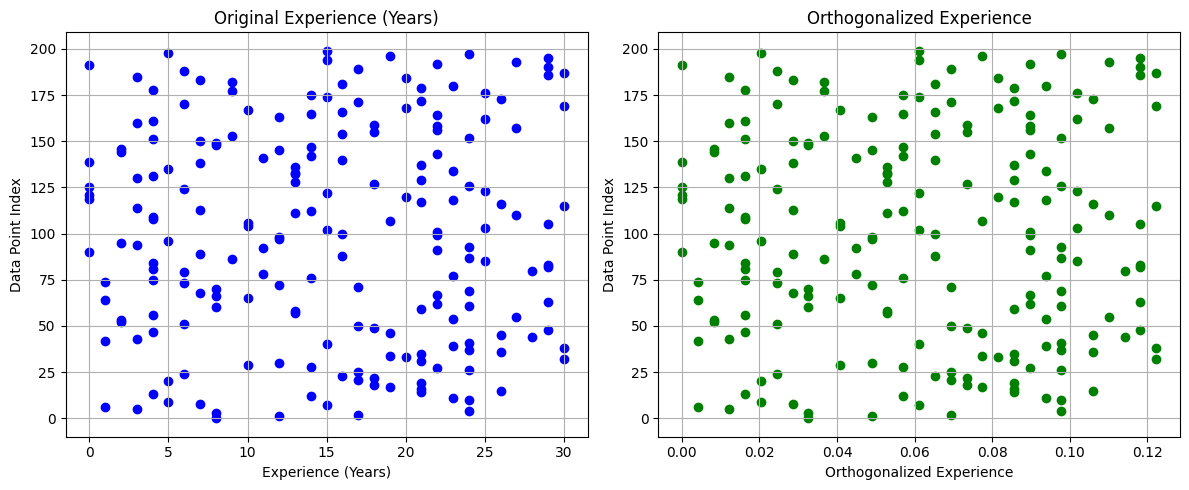

In [210]:
import matplotlib.pyplot as plt

# Extract the original "Experience (Years)" values
original_experience = data['Experience (Years)'].values

# Extract the orthogonalized_experience values (already provided)
orthogonalized_experience = X_orthogonalized[:, 1]

# Create separate scatter plots for the original and orthogonalized data
plt.figure(figsize=(12, 5))

# Scatter plot for original "Experience"
plt.subplot(1, 2, 1)
plt.scatter(original_experience, range(len(original_experience)), marker='o', color='blue')
plt.title("Original Experience (Years)")
plt.xlabel("Experience (Years)")
plt.ylabel("Data Point Index")
plt.grid(True)

# Scatter plot for orthogonalized "Experience"
plt.subplot(1, 2, 2)
plt.scatter(orthogonalized_experience, range(len(orthogonalized_experience)), marker='o', color='green')
plt.title("Orthogonalized Experience")
plt.xlabel("Orthogonalized Experience")
plt.ylabel("Data Point Index")
plt.grid(True)

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()


### Since there is not much correlation in the variables there is hardly any effect of orthoganalization of data, and hence they look almost similar and therefore almost similar to multiple linear regression

#### Unsupervised Learning